In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import plotly.express as px
from mpl_point_clicker import clicker
import plotly.graph_objects as go
import time
import pandas as pd
import glob

In [ ]:
!pip install ipympl

In [2]:
%matplotlib widget

In [3]:
def detect_peaks(sig, peak_delta):
    peaks = []
    valleys = []

    # Normalization by the mean
    norm_sig = sig - np.mean(sig)
    delta = peak_delta * np.max(norm_sig)

    mxpos = 0
    mnpos = 0
    lookformax = True
    mx = np.NINF
    mn = np.Inf

    for (i, temp) in enumerate(norm_sig):
        if (temp > mx):
            mx = temp
            mxpos = i
        if (temp < mn):
            mn = temp
            mnpos = i

        if (lookformax):

            if (temp < (mx - delta)):
                # numPeaks++
                peaks.append(mxpos)
                mn = temp
                mnpos = i
                lookformax = False

        else:

            if (temp > (mn + delta)):
                # numValleys++
                valleys.append(mnpos)
                mx = temp
                mxpos = i
                lookformax = True

    return peaks, valleys

In [56]:
import glob
from tqdm import tqdm

files = glob.glob("C:/Users/ruben/Documents/thesis/data/vipl/clean_hr/*.csv")

precisions = []
recalls = []

for file in tqdm(files[:]):
    data = np.loadtxt(file, delimiter=',', skiprows=1)
    fps = 60
    if len(data[:, 0]) < fps * 10:
        print("Signal duration too short")
        print(file)
    else:
        gt_peaks = data[np.where(data[:, 2] == 1), 0][0]

        peaks, valleys = detect_peaks(data[:, 1], 0.3)
        found_peaks = [data[i, 0] for i in peaks]

        n_correct = 0
        for peak in gt_peaks:
            dist = [abs(x - peak) for x in found_peaks]
            match = found_peaks[np.argmin(dist)]
            error = abs(match - peak)

            if error <= 100:
                n_correct += 1

        recalls.append(n_correct/len(gt_peaks))
        precisions.append(n_correct/len(found_peaks))

print(f"Average recall: {sum(recalls) / len(recalls)}")
print(f"Average precision: {sum(precisions) / len(precisions)}")

 38%|█████████████████████████████▋                                                | 840/2207 [00:07<00:11, 120.78it/s]

Signal duration too short
C:/Users/ruben/Documents/thesis/data/vipl/clean_hr\p41_v7_source2.csv


100%|█████████████████████████████████████████████████████████████████████████████| 2207/2207 [00:20<00:00, 108.79it/s]

Average recall: 0.988255668027578
Average precision: 0.9750965441079787


In [5]:
import random

files_chosen = []
p_nrs = [i+1 for i in range(107)]
for p_nr in p_nrs:
    files = glob.glob(f"C:/Users/ruben/Documents/thesis/data/vipl/clean_hr/p{p_nr}_*.csv")
    r = random.randint(0, len(files) - 1)
    files_chosen.append(files[r])
print(len(files_chosen))

107


In [13]:
files = files_chosen

fps = 60
file_index = -1
gt_valleys_data = []
found_valleys_data = []
offset_times = []

In [4]:
files = glob.glob("C:/Users/ruben/Documents/thesis/data/vicar/Signals/*.txt")
print(len(files))

fps = 500
file_index = -1
gt_valleys_data = []
found_valleys_data = []
offset_times = []

105


In [6]:
print(files)

['C:/Users/ruben/Documents/thesis/data/vicar/Signals\\01_01.txt', 'C:/Users/ruben/Documents/thesis/data/vicar/Signals\\01_02.txt', 'C:/Users/ruben/Documents/thesis/data/vicar/Signals\\01_03.txt', 'C:/Users/ruben/Documents/thesis/data/vicar/Signals\\01_04.txt', 'C:/Users/ruben/Documents/thesis/data/vicar/Signals\\01_05.txt', 'C:/Users/ruben/Documents/thesis/data/vicar/Signals\\01_06.txt', 'C:/Users/ruben/Documents/thesis/data/vicar/Signals\\01_07.txt', 'C:/Users/ruben/Documents/thesis/data/vicar/Signals\\02_01.txt', 'C:/Users/ruben/Documents/thesis/data/vicar/Signals\\02_02.txt', 'C:/Users/ruben/Documents/thesis/data/vicar/Signals\\02_03.txt', 'C:/Users/ruben/Documents/thesis/data/vicar/Signals\\02_04.txt', 'C:/Users/ruben/Documents/thesis/data/vicar/Signals\\02_05.txt', 'C:/Users/ruben/Documents/thesis/data/vicar/Signals\\02_06.txt', 'C:/Users/ruben/Documents/thesis/data/vicar/Signals\\02_07.txt', 'C:/Users/ruben/Documents/thesis/data/vicar/Signals\\03_01.txt', 'C:/Users/ruben/Document

In [424]:
with open("vicar_offset_times_valleys.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) != 0:
            offsets = row

print(len(offsets))
found_valleys_data = []

105


11


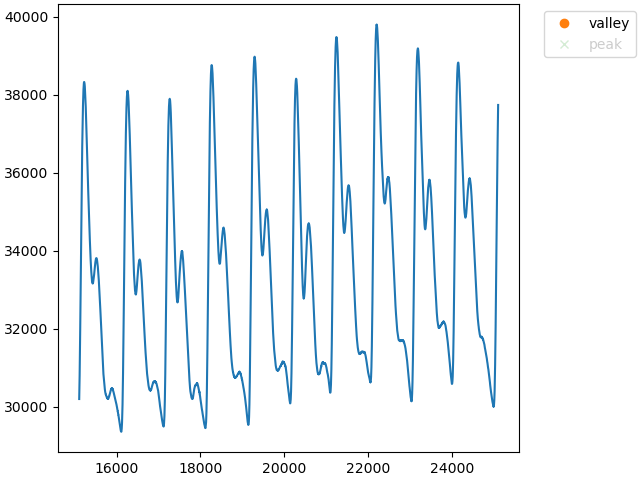

In [17]:
#gt_valleys = klicker.get_positions()['event'][:, 0]
#gt_valleys.sort()
#gt_valleys_data.append(gt_valleys)
#plt.close('all')

file_index += 1
file = files[file_index]
print(file_index)

gt_data = np.loadtxt(file, skiprows=3)[:, 1:3]
data = gt_data[np.where(gt_data[:, 0] == 1), 1][0]
#data = np.loadtxt(file, delimiter=',', skiprows=1)[:, 1]
times = [1000 / fps * i for i in range(len(data))]
#times = [fps * i for i in range(len(data))]

if len(data) < fps * 10:
    print("Signal duration too short")
else:
    offset = random.randint(0, len(data) - fps * 10)
    offset_time = offset / fps * 1000
    offset_times.append(offset)
    #offset = int(offsets[i])

    data_window = data[offset:offset+fps*10]
    times_window = times[offset:offset+fps*10]

    peaks, valleys = detect_peaks(data_window, 0.3)
    valley_times = [times_window[i] for i in valleys]
    found_valleys_data.append(valley_times)

    fig, ax = plt.subplots(constrained_layout=True)
    ax.plot(times[offset:offset+fps*10], data[offset:offset+fps*10])
    klicker = clicker(ax, ["valley", "peak"], markers=["o", "x"])

    plt.show()

In [123]:
print(len(offset_times))
print(len(gt_valleys_data))
print(len(found_valleys_data))

107
107
107


In [124]:
#gt_peaks = klicker.get_positions()['event'][:, 0]
#gt_peaks.sort()
#gt_peaks_data.append(gt_peaks)
import csv

with open("vipl_offset_times_valleys.csv", 'w') as f:
    write = csv.writer(f)
    write.writerows([offset_times])
with open("vipl_gt_valleys.csv", 'w') as f:
    write = csv.writer(f)
    write.writerows(gt_valleys_data)
with open("vipl_found_valleys.csv", 'w') as f:
    write = csv.writer(f)
    write.writerows(found_valleys_data)

In [125]:
with open("vipl_files_chosen.csv", 'w') as f:
    write = csv.writer(f)
    write.writerows([files_chosen])

In [127]:
recalls = []
precisions = []

for i in range(len(gt_valleys_data)):
    gt_valleys = gt_valleys_data[i]
    found_valleys = found_valleys_data[i]
    gt_valleys = [float(x) for x in gt_valleys]
    found_valleys = [float(x) for x in found_valleys]
    #print(gt_valleys)
    #print(found_valleys)
    
    n_correct = 0
    for valley in gt_valleys:
        dist = [abs(x - valley) for x in found_valleys]
        match = found_valleys[np.argmin(dist)]
        error = abs(match - valley)

        if error <= 100:
            n_correct += 1
            
    recalls.append(n_correct/len(gt_valleys))
    precisions.append(n_correct/len(found_valleys))

print(f"Average recall: {sum(recalls) / len(recalls)}")
print(f"Average precision: {sum(precisions) / len(precisions)}")

Average recall: 0.8910198736270755
Average precision: 0.9178523159694131
